<a href="https://colab.research.google.com/github/venkat-1150/ACM-30day-Challenge-Venkat/blob/main/case_file(day1)1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df=pd.read_csv('/content/mental_health_workplace_survey.csv')


In [15]:
print("there are", df.shape[0],"rows" )
print("there are", df.shape[1],"columns" )


there are 3000 rows
there are 25 columns


In [16]:
missing_values=df.isnull().sum()
print("missing values are",missing_values)

missing values are EmployeeID                0
Age                       0
Gender                    0
Country                   0
JobRole                   0
Department                0
YearsAtCompany            0
WorkHoursPerWeek          0
RemoteWork                0
BurnoutLevel              0
JobSatisfaction           0
StressLevel               0
ProductivityScore         0
SleepHours                0
PhysicalActivityHrs       0
CommuteTime               0
HasMentalHealthSupport    0
ManagerSupportScore       0
HasTherapyAccess          0
MentalHealthDaysOff       0
SalaryRange               0
WorkLifeBalanceScore      0
TeamSize                  0
CareerGrowthScore         0
BurnoutRisk               0
dtype: int64


In [17]:
df.isnull().sum().sort_values(ascending=False)

,0
EmployeeID,0
Age,0
Gender,0
Country,0
JobRole,0
Department,0
YearsAtCompany,0
WorkHoursPerWeek,0
RemoteWork,0
BurnoutLevel,0


In [18]:
num_cols=df.select_dtypes(include=["number"]).columns
cat_cols=df.select_dtypes(include=["object"]).columns
print("numerical columns are",num_cols)
print("categorical columns are",cat_cols)


import numpy as np
from pandas.api.types import is_numeric_dtype

for col in df.columns:
    if is_numeric_dtype(df[col]):
        # Fill numeric column with median
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
    else:
        # Fill categorical column with mode only if mode exists
        mode_vals = df[col].mode()
        if not mode_vals.empty:
            df[col] = df[col].fillna(mode_vals[0])

# for col in num_cols:
#   median_val = df[col].median()
#   df[col] = df[col].fillna(median_val, inplace=True)
# print("the missing value in ",col,"is filled with the median")

# for col in cat_cols:
#   mode_val = df[col].mode()
#   df[col] = df[col].fillna(mode_val, inplace=True)
# print("the missing value in ",col,"is filled with the mode")

# df.info()
# df.describe()

# for col in df.columns:
#     if df[col].dtype == ["float64","int64"]:
#         df[col] = df[col].fillna(df[col].median(), inplace=True)
#     else:
#         df[col] = df[col].fillna(df[col].mode(), inplace=True)


numerical columns are Index(['EmployeeID', 'Age', 'YearsAtCompany', 'WorkHoursPerWeek',
       'BurnoutLevel', 'JobSatisfaction', 'StressLevel', 'ProductivityScore',
       'SleepHours', 'PhysicalActivityHrs', 'CommuteTime',
       'ManagerSupportScore', 'MentalHealthDaysOff', 'WorkLifeBalanceScore',
       'TeamSize', 'CareerGrowthScore', 'BurnoutRisk'],
      dtype='object')
categorical columns are Index(['Gender', 'Country', 'JobRole', 'Department', 'RemoteWork',
       'HasMentalHealthSupport', 'HasTherapyAccess', 'SalaryRange'],
      dtype='object')


In [19]:
# df['WorkHoursPerWeek'] = df['WorkHoursPerWeek'].clip(upper=126)
# df['SleepHours'] = df['SleepHours'].clip(upper=16)
# df['StressLevel'] = df['StressLevel'].clip(upper=10)

In [20]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    original_size = df.shape[0]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    removed = original_size - df.shape[0]
    print(f"{removed} outliers removed from '{col}'")
    return df

# Remove outliers from important features
for col in ['WorkHoursPerWeek', 'SleepHours', 'StressLevel']:
    df = remove_outliers_iqr(df, col)



0 outliers removed from 'WorkHoursPerWeek'
0 outliers removed from 'SleepHours'
0 outliers removed from 'StressLevel'


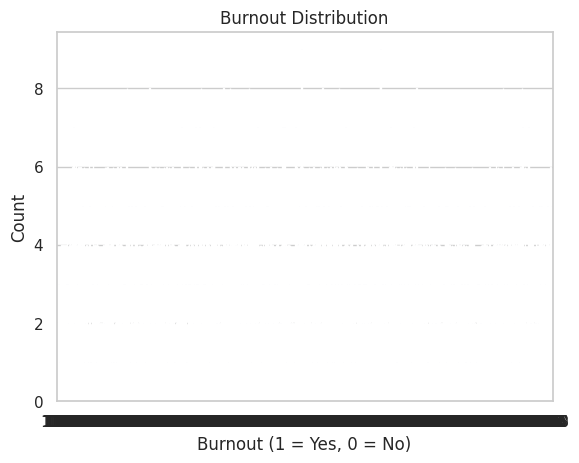

In [25]:
# Burnout counts
sns.countplot(x='BurnoutLevel', data=df)
plt.title("Burnout Distribution")
plt.xlabel("Burnout (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


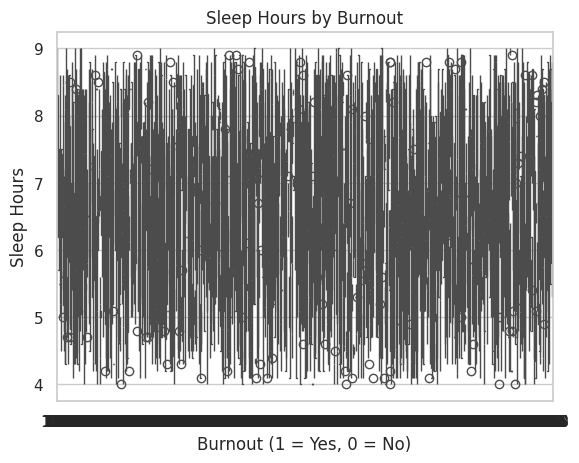

In [22]:
# Boxplot of Sleep_hours vs Burnout
sns.boxplot(x='BurnoutLevel', y='SleepHours', data=df)
plt.title("Sleep Hours by Burnout")
plt.xlabel("Burnout (1 = Yes, 0 = No)")
plt.ylabel("Sleep Hours")
plt.show()


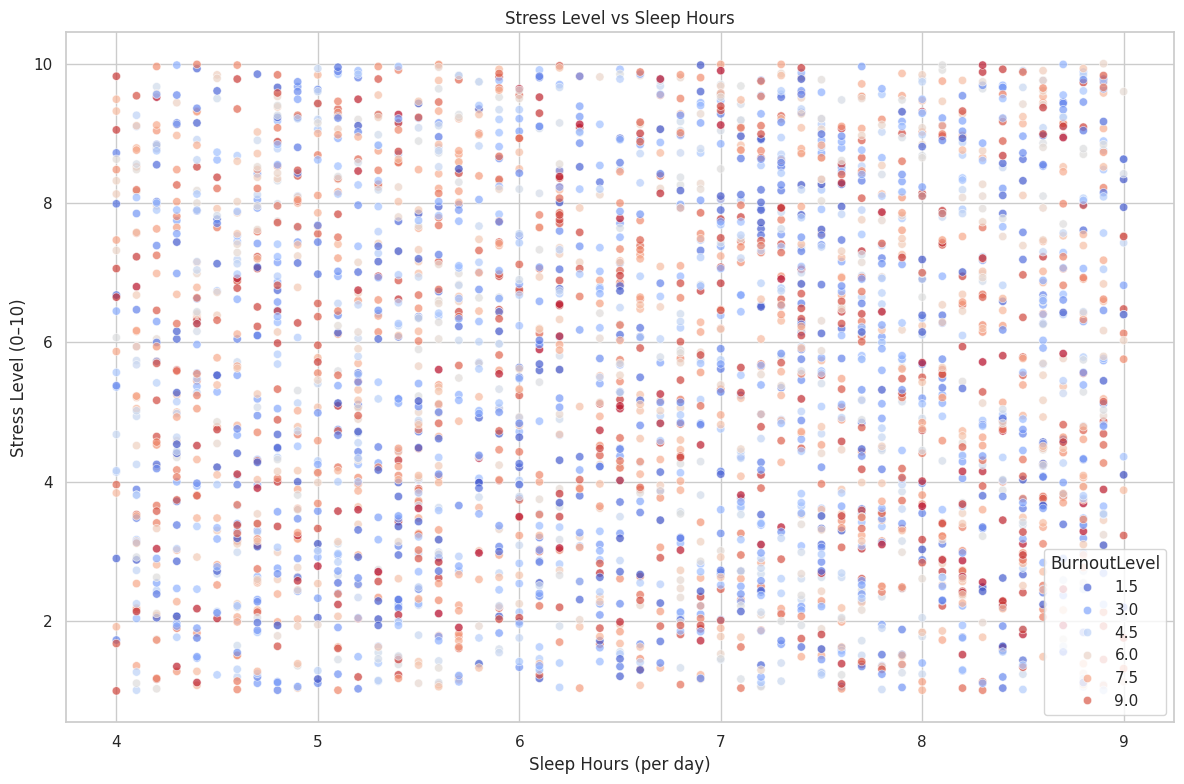

In [23]:

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='SleepHours', y='StressLevel', hue='BurnoutLevel', palette='coolwarm', alpha=0.7)
plt.title('Stress Level vs Sleep Hours')
plt.xlabel('Sleep Hours (per day)')
plt.ylabel('Stress Level (0–10)')
plt.tight_layout()
plt.show()

In [24]:
df.to_csv("cleaned_burnout_dataset.csv", index=False)
print("Cleaned dataset saved successfully.")


Cleaned dataset saved successfully.
